In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import glob
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt
import os            
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#change DIRECTORY TO downloads where final outputs ARE

os.chdir("/Users/Philip/Downloads/Inside Airbnb Raw Data/For Python")   

In [ ]:
cities = ["cambridge", "boston"]
df_reviews= []
df_reviews=pd.DataFrame(df_reviews)
months = ["jan","feb","mar","april","may","june","july","august","sept","oct","nov","dec"]
years = ["2018","2019","2020"]
years 
months

In [ ]:
# imported the requests library
import requests
file = "http://data.insideairbnb.com/united-states/ma/cambridge/2021-02-25/data/reviews.csv.gz"
  
# URL of the image to be downloaded is defined as file
r = requests.get(file) # create HTTP response object
  
# send a HTTP request to the server and save
# the HTTP response in a response object called r
with open("cambridge reviews.csv.gz",'wb') as f:
  
    # write the contents of the response (r.content)
    # to a new file in binary mode.
    f.write(r.content)

#cities = ["Cambridge", "Boston"]


In [3]:
#for i in cities:
 #       df = pd.read_csv(str(i)+" reviews.csv")   
 #       df['City']=i
 #       df_reviews=pd.concat([df_reviews,df])

#df_reviews
#df_reviews['City']
#del df_reviews
#del df_review_final
df = pd.read_csv("reviews_oct_2020.csv")  

In [ ]:
other_months = ["sept", "oct", "nov","dec"]
for i in months:
        df = pd.read_csv("reviews_"+str(i)+"_2020.csv")   
        df['Month']=i
        df['Year']="2020"
        df_reviews=pd.concat([df_reviews,df])
        del df
        df = pd.read_csv("reviews_2019_"+str(i)+".csv")   
        df['Month']=i
        df['Year']= "2019"
        df_reviews=pd.concat([df_reviews,df])
        del df
    
for k in other_months:
        df = pd.read_csv("reviews_2018_"+str(k)+".csv")   
        df['Month']=k
        df['Year']= "2018"
        df_reviews=pd.concat([df_reviews,df])  
        del df

In [4]:
df_reviews = df
df['Year'] = pd.DatetimeIndex(df['date']).year
# df['Month']=pd.DatetimeIndex(df['date']).strftime("%B")
df['Month'] = pd.DatetimeIndex(df['date']).month

In [5]:
df_final = df_reviews[(df_reviews["date"] >="2018-09-01")& (df_reviews["date"] <"2020-09-01") ]
df_final['Group'] = df_final['date'].apply(lambda x: 0 if x < "2019-09-01" else 1)
df_final.drop_duplicates(subset=['Year','Month','comments'], inplace=True)

<ipython-input-5-e3aeef9941e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Group'] = df_final['date'].apply(lambda x: 0 if x < "2019-09-01" else 1)
<ipython-input-5-e3aeef9941e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.drop_duplicates(subset=['Year','Month','comments'], inplace=True)


In [6]:
df_final['unique count'] = df_final.groupby(["Group", "Month", "listing_id"])['comments'].transform('nunique')

<ipython-input-6-9b0f4e9dc74b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['unique count'] = df_final.groupby(["Group", "Month", "listing_id"])['comments'].transform('nunique')


In [7]:
df_final


,listing_id,id,date,reviewer_id,reviewer_name,comments,Year,Month,Group,unique count
14,3781,415389126,2019-02-22,83031353,Norman,My partner and I stayed at Frank's apartment f...,2019,2,0,1
15,3781,579765013,2019-12-21,3918963,Antoine,I liked very much this apartment rented by Fra...,2019,12,1,1
86,5506,318303756,2018-09-03,159154361,Matt,The room is beautiful and feels like a boutiqu...,2018,9,0,3
87,5506,325402761,2018-09-19,213629817,Blake,Great place to stay,2018,9,0,3
88,5506,328948521,2018-09-27,62454383,E,"Terry is very hospitable and kind, as well as ...",2018,9,0,3
...,...,...,...,...,...,...,...,...,...,...
122256,44821182,653517440,2020-08-19,361632383,Dymond,Highly recommend,2020,8,1,3
122257,44821182,654898961,2020-08-22,361355771,Sasha,I love Mimis- I’m a regular here because it ha...,2020,8,1,3
122258,44821182,659146527,2020-08-31,361355771,Sasha,See my previous review- I’m a regular here bec...,2020,8,1,3
122263,44821202,656712617,2020-08-26,32633395,Luna,Terrible communication. Never gave me a refund...,2020,8,1,1


In [ ]:
df_review_final=df
#NOW FIGURE OUT THE COUNT PER EACH MONTH FROM SEPT 2018 THROUGH AUGUST 2020, SHOULD BE 24 months

In [14]:
df_final.to_csv('October 2020 Review Data Aggregated.csv')

In [ ]:
test = df[["Year", "Month","count",'listing_id']]
test.drop_duplicates(subset=['Year','Month'], inplace=True)
# test.shape
test.sort_values(by=['Year', 'Month'])

In [ ]:
test.shape

In [ ]:
ttest.columns

In [ ]:
stats.ttest_rel(ttest["2019"],ttest["2020"])

In [ ]:
#T test comparing 2019 to 2020 for each month???
ttest = test.pivot_table(index=['Month'], 
                      columns='Year', 
                      values='count', 
                      aggfunc='first').reset_index().rename_axis(None, axis=1)
#ttest.columns = ['Month','2018','2019','2020']
stats.ttest_rel(ttest['2019'],ttest['2020'])

In [ ]:
ttest.columns

In [ ]:
#Add count variable 

df_final=df_final.groupby(["Year", "Month"])["comments"].count().reset_index(name="other")

In [ ]:
# Save a palette to a variable:
palette = sns.color_palette("bright")
 
# Use palplot and pass in the variable:
sns.palplot(palette)

In [ ]:
results = pd.merge(df_final, df_reviews, on = ['Year','Month'])

In [ ]:
#df_final['other']=df_final.groupby(['Month','Year'])['comments'].nunique()
#df_unique.iloc[: ,1 ]
df_final
df_reviews

Text(0.5, 0.98, 'Number of Comments in Boston')

(0.0, 12.0)

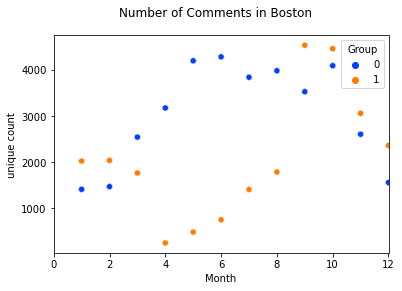

In [13]:

ax = sns.scatterplot(x="Month", y="unique count", hue="Group",data=df_final, palette=sns.color_palette('bright', n_colors=2))
#ax.text(x,y, df_final['count'])
#label = '{.2f}'.format(df_final['count'])
#plt.annotate(label,  (x,y))
plt.suptitle('Number of Comments in Boston')
plt.xlim(0, 12)
plt.savefig("Year on Year July 8.png")


In [ ]:
category_order = ['9','10','11','12','1','2','3','4','5','6','7','8']

sns.catplot(x="Month", hue="Group", kind='count', data=df_final)

In [ ]:
#SET THE STYLE
sns.set(style="darkgrid")

In [ ]:
#table = pd.pivot_table(data=df_final,index=['Group','Month'],values=['count'])
table = pd.pivot_table(data=df_final,index=['Group','Month'],aggfunc= 'count')

In [ ]:
table

In [ ]:
table.to_csv('Table.csv',index=True)

In [11]:
df_final.to_csv('Aggregated at Listing Level.csv', index=False)

In [ ]:
df_final.shape

In [ ]:
df_final.drop_duplicates(subset=['Year','Month','comments'], inplace=True)

In [ ]:
df_final.shape